<a href="https://colab.research.google.com/github/purohitn/Stock/blob/main/stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=648aa16c04e2fc03a3837e34afd183bb6439b84cc414c7992a0969d4f3b991cf
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

df = pdr.get_data_yahoo("AAPL", start="2013-01-01", end="2019-12-30")
print(df)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.960691  560518000
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.746611  352965200
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.280142  594333600
2013-01-07  18.642857  18.903570  18.400000  18.710714  16.184372  484156400
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.227928  458707200
...               ...        ...        ...        ...        ...        ...
2019-12-20  70.557503  70.662498  69.639999  69.860001  68.837494  275978000
2019-12-23  70.132500  71.062500  70.092499  71.000000  69.960800   98572000
2019-12-24  71.172501  71.222504  70.730003  71.067497  70.027306   48478800
2019-12-26  71.205002  72.495003  71.175003  72.477501  71.416672   93121200
2019-12

<function matplotlib.pyplot.show>

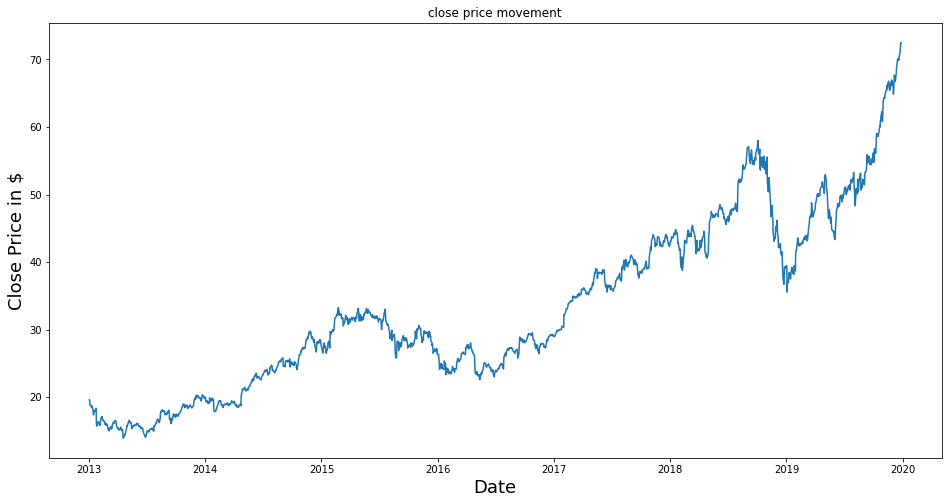

In [ ]:
plt.figure(figsize=(16,8))
plt.title('close price movement')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in $', fontsize=18)
plt.show

In [ ]:
data = df.filter(['Close'])
dataset = data.values
len(dataset)

1760

In [ ]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

1232

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.09671473],
       [0.09248614],
       [0.08327231],
       ...,
       [0.97590973],
       [1.        ],
       [0.99953009]])

In [ ]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(x_train)
        print(y_train)

[array([0.09671473, 0.09248614, 0.08327231, 0.08138073, 0.08224107,
       0.07723146, 0.08114277, 0.07918407, 0.06786508, 0.05820581,
       0.07051327, 0.06843253, 0.06679725, 0.06970784, 0.07534597,
       0.03659297, 0.03011276, 0.03618413, 0.0413341 , 0.04045544,
       0.03963779, 0.03849673, 0.03160162, 0.04107174, 0.04077275,
       0.04740548, 0.05153035, 0.05455076, 0.04721022, 0.04666715,
       0.04641088, 0.04248737, 0.04238361, 0.03558615, 0.03388371,
       0.03678211, 0.03189452, 0.03565937, 0.03297453, 0.03104025,
       0.0243709 , 0.01801275, 0.02477971, 0.02143589, 0.02443801,
       0.02513363, 0.02888628, 0.0231261 , 0.02307729, 0.02560958,
       0.03241927, 0.03977814, 0.03902762, 0.03755704, 0.03795366,
       0.0435552 , 0.04457421, 0.04308535, 0.03755704, 0.03180909])]
[0.02341900173486275]


In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1172, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1172/1172 [==============================] - 30s 19ms/step - loss: 5.3807e-04
Epoch 2/10
1172/1172 [==============================] - 22s 19ms/step - loss: 2.9527e-04
Epoch 3/10
1172/1172 [==============================] - 23s 19ms/step - loss: 1.8856e-04
Epoch 4/10
1172/1172 [==============================] - 23s 19ms/step - loss: 1.7879e-04
Epoch 5/10
1172/1172 [==============================] - 23s 19ms/step - loss: 1.4583e-04
Epoch 6/10
1172/1172 [==============================] - 23s 19ms/step - loss: 1.1357e-04
Epoch 7/10
1172/1172 [==============================] - 23s 19ms/step - loss: 1.0367e-04
Epoch 8/10
1172/1172 [==============================] - 22s 19ms/step - loss: 1.1844e-04
Epoch 9/10
1172/1172 [==============================] - 22s 19ms/step - loss: 1.1450e-04
Epoch 10/10
1172/1172 [==============================] - 22s 19ms/step - loss: 1.0469e-04


In [ ]:
test_data = scaled_data[training_data_size - 60: ,:]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [ ]:
rmse = np.sqrt(np.mean(prediction- y_test)**2)
rmse

0.5064518812930945

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

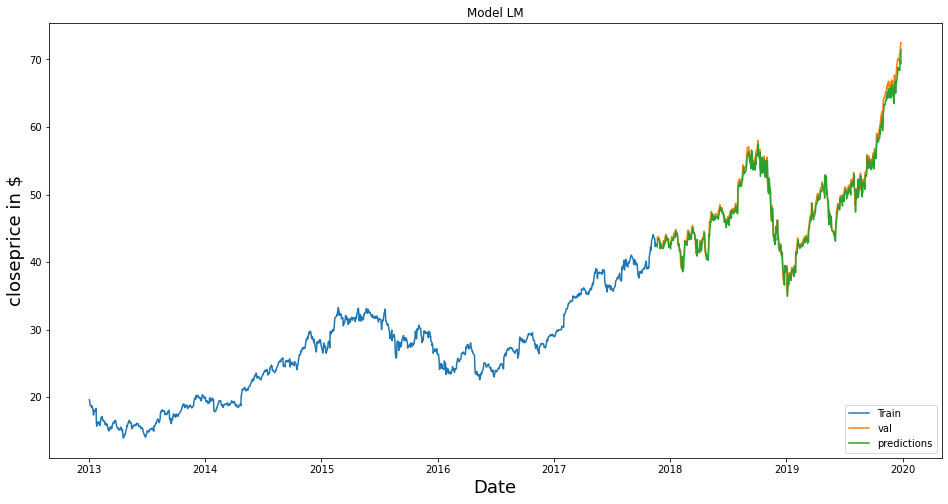

In [ ]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model LM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('closeprice in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'prediction']])
plt.legend(['Train', 'val', 'predictions'], loc='lower right')
plt.show

In [ ]:
valid

,Close,prediction
Date,,
2017-11-21,43.285000,42.239765
2017-11-22,43.740002,43.114449
2017-11-24,43.742500,43.436142
2017-11-27,43.522499,43.411003
2017-11-28,43.267502,43.198326
...,...,...
2019-12-20,69.860001,68.618217
2019-12-23,71.000000,68.358536
2019-12-24,71.067497,69.963951
